In [ ]:
DOCUMENTATION : https://docs.google.com/document/d/1sxrhIn-y466YXIDZijnk8tt5GZpeFgJsYU_wf_SYbHc/edit?usp=sharing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import MultiLabelBinarizer

In [5]:
#Uploading the data into dataset
df = pd.read_csv('train_hsbc_df.csv')

In [8]:
#Extracting the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         513643 non-null  int64  
 1   customer     513643 non-null  object 
 2   age          513643 non-null  object 
 3   gender       513643 non-null  object 
 4   zipcodeOri   513643 non-null  object 
 5   merchant     513643 non-null  object 
 6   zipMerchant  513643 non-null  object 
 7   category     513643 non-null  object 
 8   amount       513643 non-null  float64
 9   fraud        513643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 39.2+ MB


In [7]:
#Description
df.describe().round(1)

,step,amount,fraud
count,513643.0,513643.0,513643.0
mean,95.0,37.9,0.0
std,51.1,111.6,0.1
min,0.0,0.0,0.0
25%,52.0,13.7,0.0
50%,97.0,26.9,0.0
75%,139.0,42.6,0.0
max,179.0,7665.6,1.0


In [9]:
object_cols = ["category"]

for i in object_cols:
    print("name of the Column : {}".format(i))
    print("Unique column ", i, ":{}".format(df[i].nunique()))
    print("Values of unique columns of ", i, "is below: \n{}".format(df[i].value_counts()))
    print("here the history of Category where multiple times Fraudulent detection occured")


name of the Column : category
Unique column  category :15
Values of unique columns of  category is below: 
category
'es_transportation'        436311
'es_food'                   22651
'es_health'                 13917
'es_wellnessandbeauty'      13044
'es_fashion'                 5567
'es_barsandrestaurants'      5548
'es_hyper'                   5287
'es_sportsandtoys'           3437
'es_tech'                    2021
'es_home'                    1714
'es_hotelservices'           1523
'es_otherservices'            802
'es_contents'                 764
'es_travel'                   625
'es_leisure'                  432
Name: count, dtype: int64
here the history of Category where multiple times Fraudulent detection occured


In [10]:
df.isna().sum()

,0
step,0
customer,0
age,0
gender,0
zipcodeOri,0
merchant,0
zipMerchant,0
category,0
amount,0
fraud,0


In [11]:
df = pd.read_csv("train_hsbc_df.csv")

grouped = df.groupby(["age", "fraud"]).size().reset_index(name="count")

representation = px.bar(grouped, x="age", y="count", color="fraud", barmode="group",
             labels={"age": "age", "count": "No of Transactions"})

representation.show()

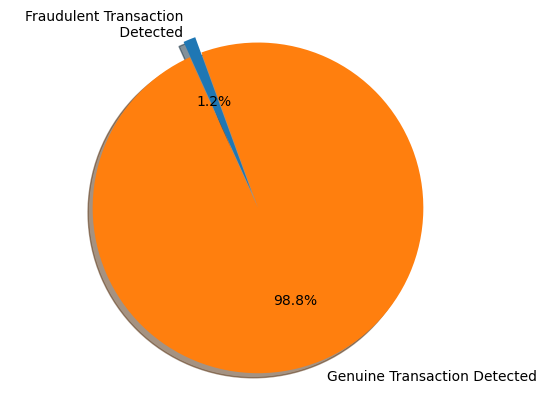

In [12]:
count1 = 0
count0 = 0
for i in df['fraud'].values:
    if i == 0:
        count0 += 1
    else:
        count1 += 1

count1 = (count1/len(df['fraud']))*100
count0 = (count0/len(df['fraud']))*100

x = ['Fraudulent Transaction\n Detected','Genuine Transaction Detected']
y = [count1, count0]


explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # I am representing piechart representation

plt.show()

In [13]:
df = pd.read_csv("train_hsbc_df.csv")

df = df[(df['fraud'] != 0) & (df['amount'] != 0)]

grouped = df.groupby('fraud')['amount'].mean().reset_index(name='mean_amount')

fig = px.bar(grouped, x='fraud', y='mean_amount', labels={'fraud':'Fraud Scenario','mean_amount':'Average Transaction Amount'})

fig.show()

In [14]:
df = pd.read_csv("train_hsbc_df.csv")

grouped = df.groupby(["age", "fraud"]).size().reset_index(name="count")

grouped = df[df['fraud'] == 1].groupby('age').size().reset_index(name='count')

fig = px.line(grouped, x='age', y='count', labels={'age':'Age','count':'Number of Fraud Transactions'})

fig.show()

In [15]:
df = pd.read_csv("train_hsbc_df.csv")
df = df.drop(df.index[0])

fraud = df[df['fraud'] == 1]

nonfr = df[df['fraud'] == 0]

n_non_fraud = len(nonfr)

frsamp = fraud.sample(n_non_fraud, replace=True)

df_sampled = pd.concat([frsamp, nonfr])

df = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('fresh_transactions.csv', index=False)

print("Succesfully ,fresh dataset is created")

Succesfully ,fresh dataset is created


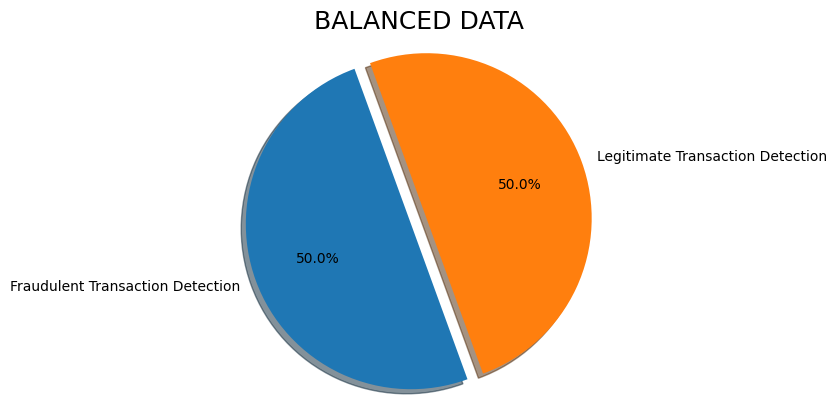

In [16]:

df = df_sampled
count1 = 0
count0 = 0
for i in df['fraud'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df['fraud']))*100
count0 = (count0/len(df['fraud']))*100

x = ['Fraudulent Transaction Detection','Legitimate Transaction Detection']
y = [count1, count0]


explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')
plt.title('BALANCED DATA',fontsize=18)
plt.show()

In [17]:
#feature Extraction

In [18]:
df = pd.read_csv("train_hsbc_df.csv")
df_features = df.drop(['age','gender','zipMerchant','category'], axis=1)
print(df_features.head())

   step       customer zipcodeOri       merchant  amount  fraud
0     0   'C583110837'    '28007'   'M480139044'   44.26      1
1     0  'C1332295774'    '28007'   'M480139044'  324.50      1
2     0  'C1160421902'    '28007'   'M857378720'  176.32      1
3     0   'C966214713'    '28007'   'M857378720'  337.41      1
4     0  'C1450140987'    '28007'  'M1198415165'  220.11      1


In [19]:
print(df_features.dtypes)
df_features = df_features.apply(pd.to_numeric, errors='coerce')

step            int64
customer       object
zipcodeOri     object
merchant       object
amount        float64
fraud           int64
dtype: object


In [20]:
df_features = df_features.fillna(0)
print(df_features.dtypes)

step            int64
customer      float64
zipcodeOri    float64
merchant      float64
amount        float64
fraud           int64
dtype: object


In [22]:
df = pd.read_csv('train_hsbc_df.csv')
mlb = MultiLabelBinarizer()
age_encoded = mlb.fit_transform(df['age'].values.reshape(-1, 1))

# Create a new DataFrame with the encoded age columns
age_df = pd.DataFrame(age_encoded, columns=mlb.classes_)

# Concatenate the encoded age DataFrame with the original DataFrame
df_encoded = pd.concat([df, age_df], axis=1)

# Dropping the uneccesary data  the original 'age' column
df_encoded = df_encoded.drop('age', axis=1)
mlb = MultiLabelBinarizer()
age_encoded = mlb.fit_transform(df['age'].values.reshape(-1, 1))

# Creating a new DataFrame with the encoded age columns
age_df = pd.DataFrame(age_encoded, columns=mlb.classes_)

# Concatenate the encoded age DataFrame with the original DataFrame
df_encoded = pd.concat([df, age_df], axis=1)

# Drop the original 'age' column
df_encoded = df_encoded.drop('age', axis=1)

In [23]:
df_encoded = df_encoded.drop(['step', 'customer', 'zipcodeOri', 'merchant', 'zipMerchant'], axis=1)

In [24]:
df_encoded['gender'] = df_encoded['gender'].apply(lambda x: 1 if x == 'F' else 0)

In [25]:
df_encoded.head()

,gender,category,amount,fraud,'0','1','2','3','4','5','6','U'
0,0,'es_health',44.26,1,0,0,0,1,0,0,0,0
1,0,'es_health',324.50,1,0,0,0,1,0,0,0,0
2,0,'es_hotelservices',176.32,1,0,0,0,1,0,0,0,0
3,0,'es_hotelservices',337.41,1,0,0,0,1,0,0,0,0
4,0,'es_wellnessandbeauty',220.11,1,0,0,0,0,1,0,0,0


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['category'] = le.fit_transform(df_encoded['category'])

In [27]:
X = df_encoded.drop('fraud', axis=1)
y = df_encoded['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#with the help of boosting method
from xgboost import XGBClassifier

# I am Initializing XGBoost classifier
xgb_classifier = XGBClassifier()

# Then, Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# The Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Then we are Calculating confusion matrix


# Calculating the final precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9942859367851337
Precision: 0.8822170900692841
Recall: 0.611689351481185
F1-score: 0.7224586288416076


In [34]:
print("Successfully implement and deploy a model that can accurately detect fraudulent transactions with minimal false positives.")
models = {"Logistic Regression": LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {acc:.3f}")

Successfully implement and deploy a model that can accurately detect fraudulent transactions with minimal false positives.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression accuracy: 0.994
K-Nearest Neighbors accuracy: 0.994
Decision Tree accuracy: 0.992
Random Forest accuracy: 0.992
Gradient Boosting accuracy: 0.995


In [29]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[101378    102]
 [   485    764]]


In [30]:
#doign with standarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_features = scaler.fit_transform(df_encoded)